In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os


In [2]:
# 1. Load Sample Data
url = "/Users/kirant/PythonProjects/NLP-Repo/Spam Classification/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

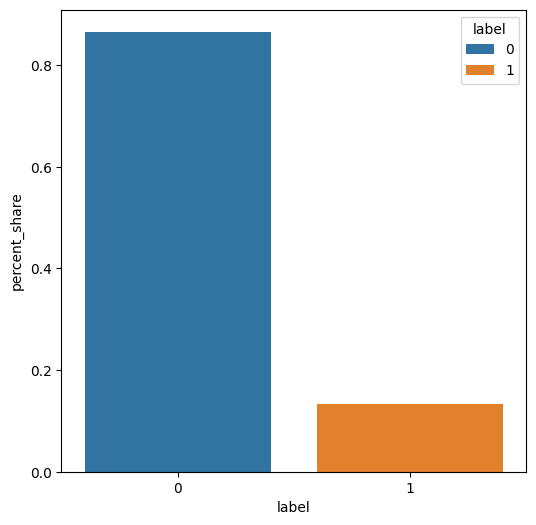

In [4]:
df_grouped = df.groupby(['label']).size().reset_index(name='count')
df_grouped['percent_share']  =df_grouped['count']/df.index.size
plt.figure(figsize = (6,6))
sns.barplot(x='label', y = 'percent_share' , data=df_grouped, hue='label' )
plt.show()

In [5]:
# Split data
X = df['message']
y = df['label']
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression (Bag Of Words)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [7]:
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train_text)
X_test_bow = vectorizer_bow.transform(X_test_text)

In [8]:
lr = LogisticRegression()
lr.fit(X_train_bow, y_train)
y_pred_lr = lr.predict(X_test_bow)

### Naive Bayes (TF -IDF)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [10]:
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train_text)
X_test_tfidf = vectorizer_tfidf.transform(X_test_text)

In [11]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

### LSTM Model

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [13]:
MAX_LEN = 100
NUM_WORDS = 10000

In [14]:
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=MAX_LEN)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=MAX_LEN)

In [15]:
model_lstm = Sequential([
    Embedding(NUM_WORDS, 64, input_length=MAX_LEN),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_seq, y_train, epochs=3, validation_split=0.2, verbose=1)
y_pred_lstm = (model_lstm.predict(X_test_seq) > 0.5).astype("int32")

Epoch 1/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8815 - loss: 0.3505 - val_accuracy: 0.9697 - val_loss: 0.1009
Epoch 2/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9872 - loss: 0.0497 - val_accuracy: 0.9821 - val_loss: 0.0671
Epoch 3/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9964 - loss: 0.0171 - val_accuracy: 0.9832 - val_loss: 0.0694
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [17]:
# 6. Evaluation
results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'LSTM': accuracy_score(y_test, y_pred_lstm)
}

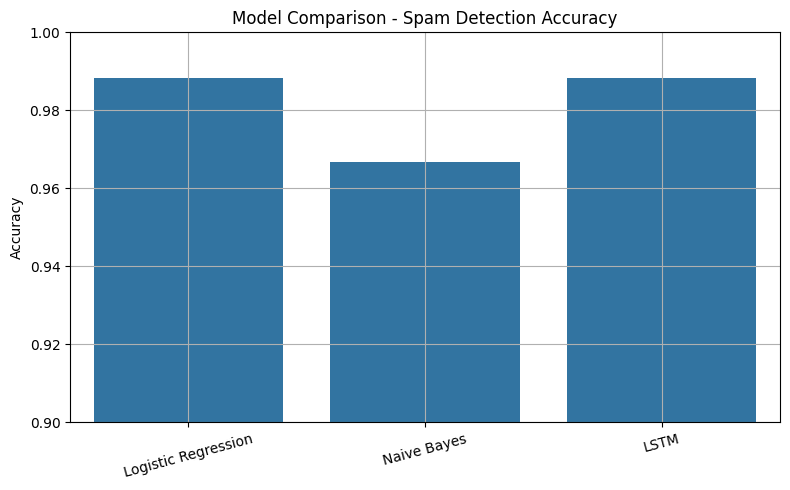

In [18]:
# 7. Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison - Spam Detection Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:

# 8. Print Classification Reports
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nNaive Bayes:\n", classification_report(y_test, y_pred_nb))
print("\nLSTM:\n", classification_report(y_test, y_pred_lstm))



Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115


Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


LSTM:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99     